# Finding corners in an image Harris and FAST

A corner can be thought as an intersection of two edges. The mathematical definition of the corners in an image is different, but reflects the same idea; the corner is a point with the following property: moving this point in any direction leads to changes in the small neighborhood of the point. For example, if we take a point on the homogeneous area of an image, moving such a point doesn't change anything in the local window nearby. A point on the edge doesn't belong to a plain region, and once again has directions, movements which don't influence a point's local area: these are movements along the edge. Only corners are movement-sensitive for all directions, and as a consequence, they are good candidates for objects to track or compare. In this recipe, we'll learn how to find corners on an image using two methods from OpenCV .

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline

def print_image(header,name,np_arr,start_First=0,end_First=1,start_Second=0,end_Second=2,start_3=0,end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')


def draw_grid(img, pxystep=None,major_color=None,
              pxstep=None,pystep=None
             ):
    pXYstep = None; pXstep=None; pYstep=None; 
    major_Color=None; minor_Color=None; major_Alpha=None; minor_Alpha=None;
    if pxystep != None:
        pXYstep = pxystep; pXstep  = pxystep; pYstep  = pxystep;
    pXstep = pxstep if pxstep != None else 100
    pYstep = pystep if pystep != None else 100
    major_Color = major_color if major_color != None else (204, 204, 204) #'#CCCCCC'
    if pXstep != None:
        x = pXstep
        #Draw all lines on X
        while x < img.shape[1]:
            cv2.line(img, (x, 0), (x, img.shape[0]), color=major_Color, thickness=1)
            x += pXstep
    if pYstep != None:
        y = pYstep
        #Draw all lines on Y
        while y < img.shape[0]:
            cv2.line(img, (0, y), (img.shape[1], y), color=major_Color,thickness=1)
            y += pYstep
    return img
            
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis); plt.title(name)
        if cmap =='gray': plt.imshow(img,cmap='gray' )
        else: plt.imshow(img)
        plot_number = plot_number + 1
    plt.show()

def plt_view_grid(plt, axis ='off',
                  xy_sizeaxis =None,
                  xy_measuare =None,
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    if xy_sizeaxis is None:  x_min=-10; x_max=10; y_min=-10; y_max=10;
    else: x_min, x_max, y_min, y_max = xy_sizeaxis

    if xy_measuare is None:  x_major_size=1; x_minor_size=0.2; y_major_size=1; y_minor_size=0.2;
    else: x_major_size, x_minor_size, y_major_size, y_minor_size = xy_measuare
        
    plt.xlim(x_min, x_max); plt.ylim(y_min, y_max);
    ax = plt.gca()
    x_major_ticks=np.arange(x_min,x_max,x_major_size); x_minor_ticks=np.arange(x_min,x_max,x_minor_size)
    y_major_ticks=np.arange(y_min,y_max,y_major_size); y_minor_ticks=np.arange(y_min,y_max,y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)
    
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S07\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s07\env

d:\html_doc\program\opencv\packt\s07\env\lib\site-packages
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S07\env


------  data/scenetext01.jpg-----    Shape(600, 800, 3) img_orig: uint8
[[203 172 193] [137 118 135] [60 62 72] [49 77 77] [ 47 102  93] [ 44 120 102] [ 51 137 113] [ 19 108  82] [ 26 108  85] [30 99 79] [37 87 77] [18 50 49] [19 35 42] [25 30 45] [21 15 38] ]
[[164 136 159] [143 127 145] [71 75 86] [26 56 57] [35 90 81] [ 80 153 137] [ 98 181 159] [ 40 126 102] [ 0 76 53] [28 94 75] [ 56 103  94] [39 72 68] [56 74 81] [ 88  96 109] [70 69 89] ]
------  cv2.COLOR_BGR2GRAY-------    Shape(600, 800) img_gray: uint8
[ 182 125 65 74 93 106 120 90 92 85 78 46 35 34 23 ]
[ 146 134 78 53 81 140 165 109 60 81 95 67 74 99 75 ]


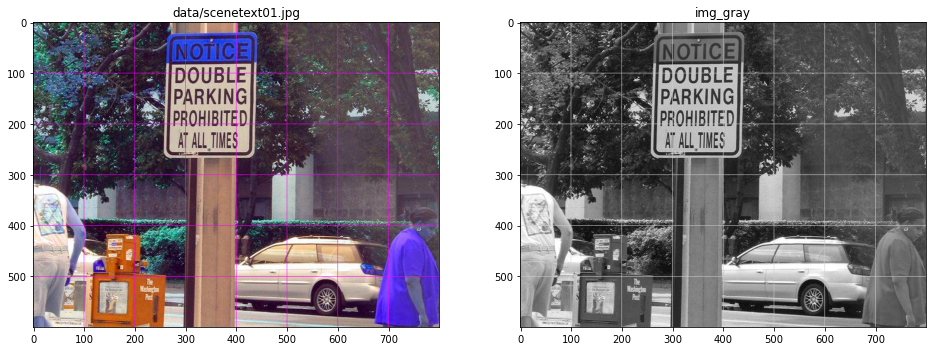

In [ ]:
# Load an image 
img_orig = cv2.imread('data/scenetext01.jpg', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)




#######################################################
print_image('data/scenetext01.jpg','img_orig',img_orig,0,2,0,15)
print_image('cv2.COLOR_BGR2GRAY','img_gray',img_gray,0,2,0,15)
plt_view_image(plt,[["data/scenetext01.jpg",draw_grid(np.copy(img_orig),100,(255,0,255))],
                    ["img_gray",draw_grid(np.copy(img_gray),100)]],
               figsize=(16,8), axis='on', cmap='gray')

cv2.imshow('img_gray',draw_grid(np.copy(img_gray),100))
cv2.waitKey()
cv2.destroyAllWindows()

## Find its corners with `cv2.cornerHarris`:

`cv2.cornerHarris` is OpenCV's function which implements, as follows from the name, the `Harris` corners detector. It takes six arguments: the first four arguments are mandatory and last two arguments have default values. The arguments are as follows:

* Single-channel 8-bit or floating-point image, on which corners are to be detected 
* Size of the neighborhood window: it should be set to a small value larger than 1 
* Size of the window to compute derivatives: it should be set to an odd number 
* Sensitivity coefficient for the corners detector: it's usually set to 0.04 
* An object where you can store the results 
* The borders extrapolation method

The borders extrapolation method determines the manner of image extending. It can be set to a bunch of values (`cv2.BORDER_CONSTANT`, `cv2.BORDER_REPLICATE`, and so on), and by default, `cv2.BORDER_REFLECT_101` is used. The result of the `cv2.cornerHarris` call is a map of the `Harris` measure. Points with higher values are more likely to be good corners.

In [ ]:
#Find its corners with Harris edge detector.
#cv2.cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
#  src – Input single-channel 8-bit or floating-point image.
#  dst – Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
#  blockSize – Neighborhood size (see the details on cornerEigenValsAndVecs() ).
#  ksize – Aperture parameter for the Sobel() operator.
#  k – Harris detector free parameter.
#  borderType – Pixel extrapolation method. See borderInterpolate() .

cornerHarris = cv2.cornerHarris(np.copy(img_gray), 2, 3, 0.04)


#####################################################
print_image('img_gray','img_gray',img_gray,1,3,17,33)
print_image('cornerHarris','corners',cornerHarris,1,3,17,33)

In [ ]:
img_cornerHarris = np.copy(img_orig)


#img_cornerHarris[cornerHarris > 0.1*cornerHarris.max()]=[0,0,255]
max = cornerHarris.max()
for i in range(cornerHarris.shape[0]):
    for j in range(cornerHarris.shape[1]):
        if cornerHarris[i,j] >0.1*max:
            cv2.circle(img_cornerHarris, (j,i), 2, (0,255,255), cv2.FILLED)

########################################################            
print_image('img_gray','img_gray',img_gray,1,3,17,33)
print_image('cornerHarris','corners',cornerHarris,1,3,17,33)
print_image('img_cornerHarris','img_cornerHarris',img_cornerHarris,1,3,17,33)

plt_view_image(plt,[["img_gray",draw_grid(np.copy(img_gray),100)]], 
               figsize=(12,12), axis='on', cmap='gray')
plt_view_image(plt,[["cornerHarris",draw_grid(cv2.normalize(np.copy(cornerHarris),
                                            None,0,255,cv2.NORM_MINMAX).astype(np.uint8))]], 
               figsize=(12,12), axis='on', cmap='gray')
plt_view_image(plt,[["img_cornerHarris", draw_grid(cv2.normalize(np.copy(img_cornerHarris[:,:,[2,1,0]]),
                                                       None,0,255,cv2.NORM_MINMAX).astype(np.uint8))]],
               figsize=(12,12), axis='on', cmap='gray')
####################
cv2.imshow('img_orig, img_cornerHarris', np.hstack([draw_grid(np.copy(img_orig)),
                                                    draw_grid(np.copy(img_cornerHarris))]))
cv2.imshow('cornerHarris', 
           draw_grid(np.copy(cv2.normalize(cornerHarris,None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8))))
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#https://docs.opencv.org/2.4/doc/tutorials/imgproc/erosion_dilatation/erosion_dilatation.html

#http://robocraft.ru/blog/computervision/319.html
# Erode — размывание(операция сужения)
# Dilate — растягивание(операция расширения)
#
# В cvErode() ядро накладывается на изображение и на месте якоря (центр ядра) остаётся 
# минимальное значение, лежащее под ядром (в случае cvDilate() — наоборот — максимальное )
# Эрозия (размывание/сужение) изображения обычно используется для избавления от случайных 
# вкраплений на изображении. 
# Идея состоит в том, что вкрапления при размывании устранятся, тогда как крупные и соответсвенно 
# более визуально-значимые регионы остаются. 
# (изображение формируется из локальных минимумов — т.е. будут увеличиваться тёмные области)
# Растягивание (расширение) же, по идее, так же должно устранять шум и способствовать 
# объединению областей изображения, которые были разделены шумом, тенями, etc.
# Применение же небольшого растягивания должно сплавить эти области в одну.
# (изображение формируется из локальных максимумов — т.е. будут увеличиваться светлые области)
# Морфологические операции, чаще всего, применяются над двоичными изображениями, которые 
# получаются после порогового преобразования (thresholding).

# расширяет Dilates an image by using a specific structuring element.
#cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
#  src – input image; the number of channels can be arbitrary, but the depth should be one of 
#        CV_8U, CV_16U, CV_16S, CV_32F, CV_64F.
#  dst – output image of the same size and type as src.
#  element – structuring element used for dilation; if element=Mat() , 
#            a 3x3 rectangular structuring element is used.
#  anchor – position of the anchor within the element; default value (-1, -1) means that 
#           the anchor is at the element center.
#  iterations – number of times dilation is applied.
#  borderType – pixel extrapolation method (see borderInterpolate() for details).
#  borderValue – border value in case of a constant border 
#                (see createMorphologyFilter() for details).

corners_dilate = cv2.dilate(cornerHarris, None)


img_cornerDilate = np.copy(img_orig)
max = corners_dilate.max()
for i in range(corners_dilate.shape[0]):
    for j in range(corners_dilate.shape[1]):
        if corners_dilate[i,j] >0.1*max:
            cv2.circle(img_cornerDilate, (j,i), 2, (0,255,255), cv2.FILLED)


##########################################################
print_image('cornerHarris','cornerHarris',cornerHarris,1,3,17,33)
print_image('corners_dilate','corners_dilate',corners_dilate,1,3,17,33)
print("corners_dilate.max() ==",corners_dilate.max())

plt_view_image(plt,[["cornerHarris",draw_grid(img_cornerHarris)[:,:,[2,1,0]]],
                    ["corners_dilate", draw_grid(img_cornerDilate)[:,:,[2,1,0]]]],
               figsize=(18,9), axis='on', cmap='gray')
plt_view_image(plt,[["cornerHarris",draw_grid(cv2.normalize(np.copy(cornerHarris),
                                            None,0,255,cv2.NORM_MINMAX).astype(np.uint8))],
                    ["corners_dilate", draw_grid(cv2.normalize(np.copy(corners_dilate),
                                            None,0,255,cv2.NORM_MINMAX).astype(np.uint8))]],
               figsize=(18,9), axis='on', cmap='gray')

In [ ]:
show_img = np.copy(img_orig)
show_img[corners_dilate>0.1*corners_dilate.max()]=[0,0,255]


corners_dilate_norm = cv2.normalize(corners_dilate, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)




##############################################
print_image('img_gray','img_gray',img_gray,1,3,17,33)
print_image('corners_dilate','corners_dilate',corners_dilate,1,3,17,33)
print_image('corners_dilate_norm','corners_dilate_norm',corners_dilate_norm,1,3,17,33)

plt_view_image(plt,[["cornerHarris",draw_grid(img_cornerHarris)[:,:,[2,1,0]]],
                    ["corners_dilate", draw_grid(img_cornerDilate)[:,:,[2,1,0]]]],
               figsize=(18,9), axis='on', cmap='gray')
plt_view_image(plt,[["cornerHarris",draw_grid(cv2.normalize(np.copy(cornerHarris),
                                                None,0,255,cv2.NORM_MINMAX).astype(np.uint8))],
                    ["corners_dilate", draw_grid(cv2.normalize(np.copy(corners_dilate),
                                                None,0,255,cv2.NORM_MINMAX).astype(np.uint8))]],
               figsize=(18,9), axis='on', cmap='gray')
plt_view_image(plt,[["corners_dilate",corners_dilate],
                    ["corners_dilate_norm", draw_grid(corners_dilate_norm)]],
               figsize=(18,9), axis='on', cmap='gray')


cv2.imshow('Harris corner detector', 
           np.hstack((show_img, cv2.cvtColor(corners_dilate_norm, cv2.COLOR_GRAY2BGR))))
cv2.waitKey()
cv2.destroyAllWindows()

##  Create a FAST detector and apply it to the image

Another method we've applied in this recipe is the **Features from Accelerated Segment Test (FAST)** detector. It also finds corners on an image, but in another way. It considers a circle around each point and computes some statistics on that circle. Let's find out how to use FAST.

First, we need to create a detector using `cv2.FastFeatureDetector_create`. This function accepts an integer threshold, a flag to enable non-maximum suppression, and a mode that determines both the size of the neighbor area and the number of points threshold. All of these parameters can be modified later using corresponding methods of the `cv2.FastFeatureDetector` class (`setNonmaxSuppression`, in the previous code).

To use the detector after the initialization, we need to call the `cv2.FastFeatureDetector.detect` function. It takes a single-channel image and returns a list of `cv2.KeyPoint` objects. This list can be converted to a numpy array by `cv2.KeyPoint.convert`. Each element in the resulting array is a point of the corner.

In [ ]:
#Detects corners using the FAST algorithm
# Create a FAST detector
fast = cv2.FastFeatureDetector_create(30, 
                                      True, 
                                      cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )

In [ ]:
# apply FAST detector to the image:

#cv2.KeyPoint([x, y, _size[, _angle[, _response[, _octave[, _class_id]]]]]) → <KeyPoint object
# x – x-coordinate of the keypoint
# y – y-coordinate of the keypoint
# _pt – x & y coordinates of the keypoint
# _size – keypoint diameter
# _angle – keypoint orientation
# _response – keypoint detector response on the keypoint (that is, strength of the keypoint)
# _octave – pyramid octave in which the keypoint has been detected
# _class_id – object id

kp_supres = fast.detect(img_orig)

fast.setNonmaxSuppression(False)
kp_notsupres = fast.detect(img_orig)



#####################################################
print( "Total Keypoints with nonmaxSuppression: {0} ".format(len(kp_supres)) )
print('kp.shape ==',cv2.KeyPoint_convert(kp_supres).shape )

print( "Total Keypoints without nonmaxSuppression: {0} ".format(len(kp_notsupres)) )
print('kp_notsupres.shape ==',cv2.KeyPoint_convert(kp_notsupres).shape )

In [ ]:
img_FASTsupres = np.copy(img_orig)
for p in cv2.KeyPoint_convert(kp_supres):
    cv2.circle(img_FASTsupres, tuple(p), 2, (0, 255, 0), cv2.FILLED)

Disable the non-maximum suppression, retrieve the corners, and display the results:

In [ ]:
img_FASTnotsupres = np.copy(img_orig)
for p in cv2.KeyPoint_convert(kp_notsupres):
    cv2.circle(img_FASTnotsupres, tuple(p), 2, (0, 255, 0), cv2.FILLED)



#############################################
plt_view_image(plt,[["img_FASTsupres",draw_grid(np.copy(img_FASTsupres))[:,:,[2,1,0]]],
                    ["img_FASTnotsupres", draw_grid(np.copy(img_FASTnotsupres))[:,:,[2,1,0]]]],
               figsize=(18,9), axis='on', cmap='gray')
plt_view_image(plt,[["cornerHarris",draw_grid(np.copy(img_cornerHarris))[:,:,[2,1,0]]],
                    ["corners_dilate", draw_grid(np.copy(img_cornerDilate))[:,:,[2,1,0]]]],
               figsize=(18,9), axis='on', cmap='gray')

cv2.imshow('FAST corner detector', 
           np.hstack([draw_grid(np.copy(img_FASTsupres)),draw_grid(np.copy(img_FASTnotsupres))]))
cv2.imshow('Harris corner detector', 
           np.hstack([draw_grid(np.copy(img_cornerHarris)),draw_grid(np.copy(img_cornerDilate))]))
cv2.waitKey()
cv2.destroyAllWindows()